In [56]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________
import ERROR
import CONFIG
import DBPARSE
from ASYMMETRY import *
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend
import CORRECTIONS

from joblib import Parallel, delayed

In [2]:
pas="1"
config="3"

# Cuts

In [3]:
W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")

print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')

W2min: 0
W2max: 1.4947
dxmin: -0.4
dxmax: 0.402
dymin: -0.7895
dymax: 0.7895
dybgmin: -1.2
dybgmax: 1.2
Coin Min: 82 Coin Max: 106


In [4]:
cut="w2"
value=[W2min,W2max]

In [5]:
#w2
cutw2="w2"
valuemaxw2=np.linspace(.2,2.2,175)
valueminw2=np.linspace(0,0,175)

valuew2=np.transpose(np.stack([valueminw2,valuemaxw2],axis=0))

#dy
cutdy="dy"
valuemaxdy=np.linspace(.2,1.5,175)
valuemindy=np.linspace(-.2,-1.5,175)
valuedy=np.transpose(np.stack([valuemindy,valuemaxdy],axis=0))

#dx
cutdx="dx"
valuemaxdx=np.linspace(0.01,1,175)
valuemindx=np.linspace(-.01,-1,175)
valuedx=np.transpose(np.stack([valuemindx,valuemaxdx],axis=0))


# Calculate Raw Asymmetry, Fit dx and determine fA for bg,proton,accidentals- Calc Aphys

In [57]:
def Function_APHYSSENS(config,cut,value):
    import ROOT as r
    import math
    import array
    import os
    import sys
    import matplotlib.pyplot as plt
    import numpy as np

    #______________Add include directory_______________
    current_dir = os.getcwd()
    include_dir = os.path.join(current_dir, '../include')
    sys.path.insert(0, include_dir)
    #__________________________________________________
    import ERROR
    import CONFIG
    import DBPARSE
    import ASYMMETRY 
    import UTILITIES 
    from SIMFITS import DistributionFits
    from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend

    import CORRECTIONS
    from joblib import Parallel, delayed
    
    dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
    dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
    lower_bound=dxmin
    upper_bound=dxmax
    Raw=ASYMMETRY.Function_ASYMMETRYSENS(config,cut,value)
    print("Raw Asymmetry Calculated")
    
    Fit=ASYMMETRY.Function_FITDXSENS(config,cut,value)
    print("dx Histogram Fit Completed")
    
    data,bg,totalFit,simp,simn=Fit
    bin_centers,bin_contents=bg
    numBG=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])
    bin_centers,bin_contents=data
    numTotal=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])
    bin_centers,bin_contents=simp
    numP=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])
    
    accResult,bgResult,fp=CORRECTIONS.Function_ANALYZEROOTFILE(config,bg,simp,totalFit)
    
    bin_centers,bin_contents=simn
    Y=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])
    print("Background Fraction Determined")
    
    Phys=ASYMMETRY.Function_APHYS(config,pas,Raw,accResult,bgResult,fp)
    print("Aphys Calculated")
    
    weighted_A,weighted_A_E,fbackg=Phys
    print('Returned: Aphys, Aphys_E, fbg, cut, cutvalue')
    return weighted_A,weighted_A_E,fbackg,cut,value,Y

In [7]:
Results=Function_APHYSSENS(config,cut,value)

# GEN2__________________________________________________________

In [8]:
config="2"

# W2

In [9]:
%%time
n_jobs = -1  # Use all available CPU cores
Results2w2 = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutw2,val) for (val) in valuew2)

CPU times: user 916 ms, sys: 904 ms, total: 1.82 s
Wall time: 25min 58s


Error in <TList::Clear>: A list is accessing an object (0x815d920) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x815ddf0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x815e030) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x81903d0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x8190740) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x8190ab0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x8190f10) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x84e2130) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x84e2540) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x84e2930) alread

In [12]:
A_result_2=np.empty(0)
E_result_2=np.empty(0)
fbg_result_2=np.empty(0)
cut_result_2=np.empty(0)
w2_2=np.empty(0)
Y_2=np.empty(0)


for i in range(0,len(Results2w2)):
    A_result_2=np.append(A_result_2,Results2w2[i][0])
    E_result_2=np.append(E_result_2,Results2w2[i][1])  
    fbg_result_2=np.append(fbg_result_2,Results2w2[i][2])
    cut_result_2=np.append(cut_result_2,Results2w2[i][3])
    w2_2=np.append(w2_2,Results2w2[i][4][1])
    Y_2=np.append(Y_2,Results2w2[i][5])

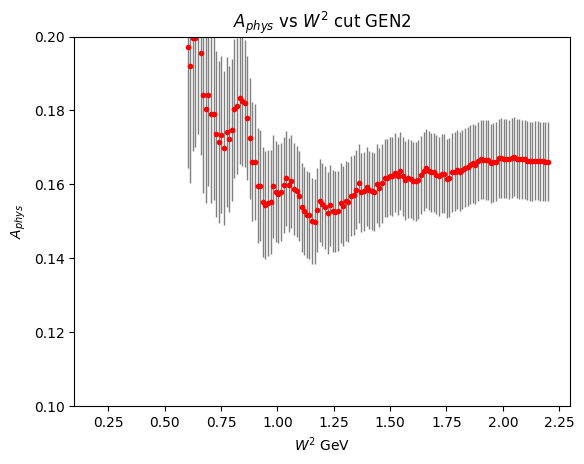

In [13]:
config="2"
plt.errorbar(w2_2,A_result_2,E_result_2,fmt='.',ecolor='grey',color='red',lw=1)
#plt.plot(w2_2,Y_2)
#plt.yscale('log')
plt.ylim(.1,.2)
plt.title("$A_{phys}$ vs $W^2$ cut GEN"+config)
plt.xlabel("$W^2$ GeV")
plt.ylabel("$A_{phys}$")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_w2.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/APHYS_w2.npy', {
    'A': A_result_2,
    'AE': E_result_2,
    'cut': w2_2,
},allow_pickle=True)

# dY

In [14]:
%%time
n_jobs = -1  # Use all available CPU cores
Results2dy = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutdy,val) for (val) in valuedy)

CPU times: user 1.05 s, sys: 691 ms, total: 1.74 s
Wall time: 25min 35s


Error in <TList::Clear>: A list is accessing an object (0x71d8890) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x71d8d60) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x71d8fa0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x720b340) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x720b6b0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x720ba20) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x720be80) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x755d840) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x755dc50) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x755e040) alread

In [16]:
A_result_2dy=np.empty(0)
E_result_2dy=np.empty(0)
fbg_result_2dy=np.empty(0)
cut_result_2dy=np.empty(0)
dy_2=np.empty(0)
Y_2dy=np.empty(0)


for i in range(0,len(Results2dy)):
    A_result_2dy=np.append(A_result_2dy,Results2dy[i][0])
    E_result_2dy=np.append(E_result_2dy,Results2dy[i][1])  
    fbg_result_2dy=np.append(fbg_result_2dy,Results2dy[i][2])
    cut_result_2dy=np.append(cut_result_2dy,Results2dy[i][3])
    dy_2=np.append(dy_2,Results2dy[i][4][1])
    Y_2dy=np.append(Y_2dy,Results2dy[i][5])

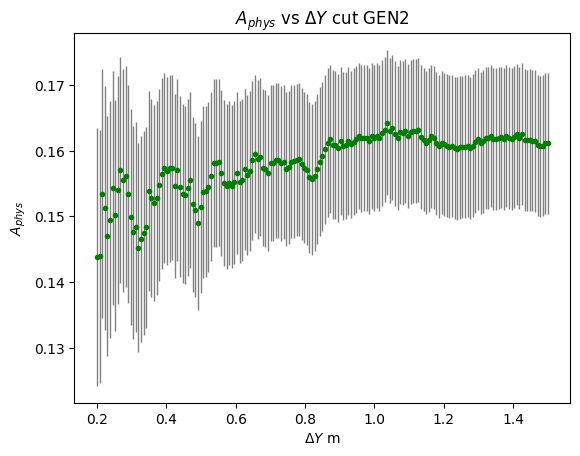

In [17]:
config="2"
plt.errorbar(dy_2,A_result_2dy,E_result_2dy,fmt='.',ecolor='grey',color='green',lw=1)
plt.title("$A_{phys}$ vs $\Delta Y$ cut GEN"+config)
plt.xlabel("$\Delta Y$ m")
plt.ylabel("$A_{phys}$")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_dy.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/APHYS_dy.npy', {
    'A': A_result_2dy,
    'AE': E_result_2dy,
    'cut': dy_2,
},allow_pickle=True)

# dx

In [18]:
%%time
n_jobs = -1  # Use all available CPU cores
Results2dx = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutdx,val) for (val) in valuedx)

CPU times: user 976 ms, sys: 786 ms, total: 1.76 s
Wall time: 25min 13s


Error in <TList::Clear>: A list is accessing an object (0x6e5d540) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6e5da10) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6e5dc50) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6e8fff0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6e90360) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6e906d0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6e90b30) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x71e1d60) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x71e2170) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x71e2560) alread

In [19]:
A_result_2dx=np.empty(0)
E_result_2dx=np.empty(0)
fbg_result_2dx=np.empty(0)
cut_result_2dx=np.empty(0)
dx_2=np.empty(0)
Y_2dx=np.empty(0)


for i in range(0,len(Results2dx)):
    A_result_2dx=np.append(A_result_2dx,Results2dx[i][0])
    E_result_2dx=np.append(E_result_2dx,Results2dx[i][1])  
    fbg_result_2dx=np.append(fbg_result_2dx,Results2dx[i][2])
    cut_result_2dx=np.append(cut_result_2dx,Results2dx[i][3])
    dx_2=np.append(dx_2,Results2dx[i][4][1])
    Y_2dx=np.append(Y_2dx,Results2dx[i][5])

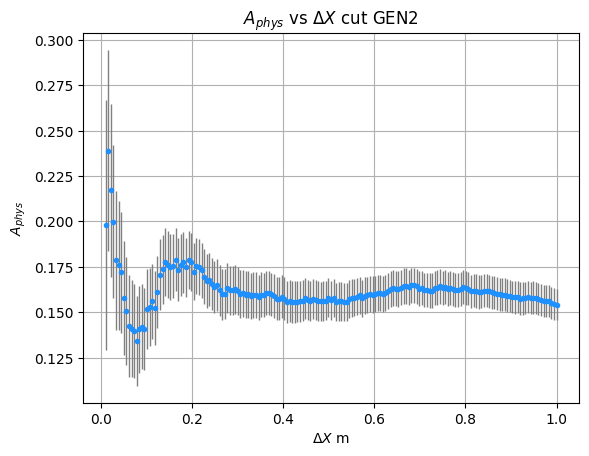

In [20]:
config="2"
plt.errorbar(dx_2,A_result_2dx,E_result_2dx,fmt='.',ecolor='grey',color='dodgerblue',lw=1)
plt.title("$A_{phys}$ vs $\Delta X$ cut GEN"+config)
plt.xlabel("$\Delta X$ m")
plt.grid()
plt.ylabel("$A_{phys}$")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_dx.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/APHYS_dx.npy', {
    'A': A_result_2dx,
    'AE': E_result_2dx,
    'cut': dx_2,
},allow_pickle=True)

# GEN3___________________________________________________________

In [21]:
config="3"

# W2

In [22]:
%%time
pas="1"
n_jobs = -1  # Use all available CPU cores
Results3 = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutw2,val) for (val) in valuew2)



CPU times: user 970 ms, sys: 657 ms, total: 1.63 s
Wall time: 26min 32s


In [23]:
A_result_3=np.empty(0)
E_result_3=np.empty(0)
fbg_result_3=np.empty(0)
cut_result_3=np.empty(0)
w2_3=np.empty(0)
Y_3=np.empty(0)


for i in range(0,len(Results3)):
    A_result_3=np.append(A_result_3,Results3[i][0])
    E_result_3=np.append(E_result_3,Results3[i][1])  
    fbg_result_3=np.append(fbg_result_3,Results3[i][2])
    cut_result_3=np.append(cut_result_3,Results3[i][3])
    w2_3=np.append(w2_3,Results3[i][4][1])
    Y_3=np.append(Y_3,Results3[i][5])

In [24]:
#plt.plot(w2,Y)

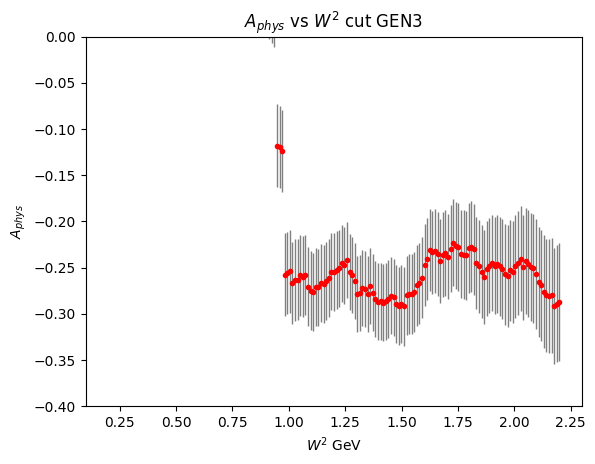

In [25]:
config="3"
plt.errorbar(w2_3,A_result_3,E_result_3,fmt='.',ecolor='grey',color='red',lw=1)
plt.ylim(-.4,0)
plt.title("$A_{phys}$ vs $W^2$ cut GEN"+config)
plt.xlabel("$W^2$ GeV")
plt.ylabel("$A_{phys}$")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_w2.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/APHYS_w2.npy', {
    'A': A_result_3,
    'AE': E_result_3,
    'cut': w2_3,
},allow_pickle=True)

# dy

In [26]:
%%time
n_jobs = -1  # Use all available CPU cores
Results3dy = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutdy,val) for (val) in valuedy)

CPU times: user 917 ms, sys: 687 ms, total: 1.6 s
Wall time: 26min 23s


In [27]:
A_result_3dy=np.empty(0)
E_result_3dy=np.empty(0)
fbg_result_3dy=np.empty(0)
cut_result_3dy=np.empty(0)
dy_3=np.empty(0)
Y_3dy=np.empty(0)


for i in range(0,len(Results3dy)):
    A_result_3dy=np.append(A_result_3dy,Results3dy[i][0])
    E_result_3dy=np.append(E_result_3dy,Results3dy[i][1])  
    fbg_result_3dy=np.append(fbg_result_3dy,Results3dy[i][2])
    cut_result_3dy=np.append(cut_result_3dy,Results3dy[i][3])
    dy_3=np.append(dy_3,Results3dy[i][4][1])
    Y_3dy=np.append(Y_3dy,Results3dy[i][5])

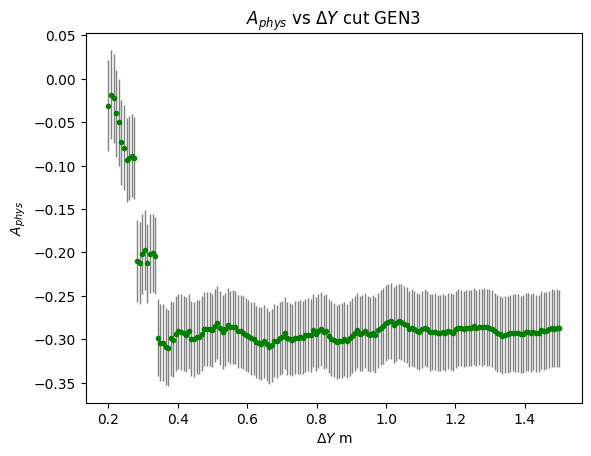

In [28]:
config="3"
plt.errorbar(dy_3,A_result_3dy,E_result_3dy,fmt='.',ecolor='grey',color='green',lw=1)
plt.title("$A_{phys}$ vs $\Delta Y$ cut GEN"+config)
plt.xlabel("$\Delta Y$ m")
plt.ylabel("$A_{phys}$")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_dy.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/APHYS_dy.npy', {
    'A': A_result_3dy,
    'AE': E_result_3dy,
    'cut': dy_3,
},allow_pickle=True)

# dx

In [30]:
%%time
n_jobs = -1  # Use all available CPU cores
Results3dx = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutdx,val) for (val) in valuedx)

/home/research/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 1.06 s, sys: 820 ms, total: 1.88 s
Wall time: 26min


Error in <TList::Clear>: A list is accessing an object (0x74f70d0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x752d6b0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x752d8f0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x752db00) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x752de70) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x752e1e0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x752e640) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x752ea00) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x787e2e0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x787e6d0) alread

In [31]:
A_result_3dx=np.empty(0)
E_result_3dx=np.empty(0)
fbg_result_3dx=np.empty(0)
cut_result_3dx=np.empty(0)
dx_3=np.empty(0)
Y_3dx=np.empty(0)


for i in range(0,len(Results3dx)):
    A_result_3dx=np.append(A_result_3dx,Results3dx[i][0])
    E_result_3dx=np.append(E_result_3dx,Results3dx[i][1])  
    fbg_result_3dx=np.append(fbg_result_3dx,Results3dx[i][2])
    cut_result_3dx=np.append(cut_result_3dx,Results3dx[i][3])
    dx_3=np.append(dx_3,Results3dx[i][4][1])
    Y_3dx=np.append(Y_3dx,Results3dx[i][5])

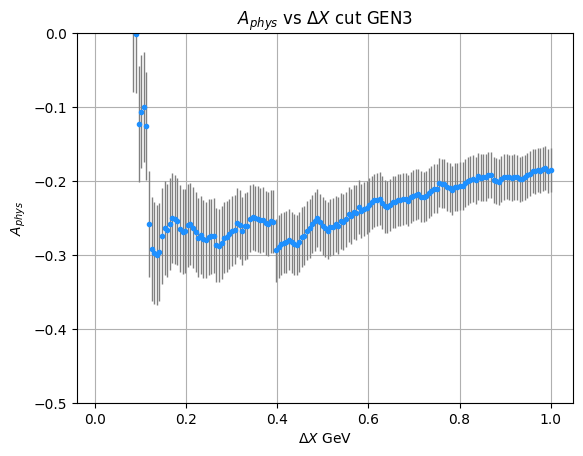

In [32]:
config="3"
plt.errorbar(dx_3,A_result_3dx,E_result_3dx,fmt='.',ecolor='grey',color='dodgerblue',lw=1)
plt.title("$A_{phys}$ vs $\Delta X$ cut GEN"+config)
plt.xlabel("$\Delta X$ GeV")
plt.ylabel("$A_{phys}$")
plt.ylim(-.5,0)
plt.grid()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_dx.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/APHYS_dx.npy', {
    'A': A_result_3dx,
    'AE': E_result_3dx,
    'cut': dx_3,
},allow_pickle=True)

# GEN4

# W2

In [33]:
config="4"

In [34]:
%%time
pas="1"
n_jobs = -1  # Use all available CPU cores
Results4= Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutw2,val) for (val) in valuew2)

CPU times: user 481 ms, sys: 231 ms, total: 712 ms
Wall time: 8min 47s


In [35]:
A_result_4=np.empty(0)
E_result_4=np.empty(0)
fbg_result_4=np.empty(0)
cut_result_4=np.empty(0)
w2_4=np.empty(0)
Y_4=np.empty(0)


for i in range(0,len(Results4)):
    A_result_4=np.append(A_result_4,Results4[i][0])
    E_result_4=np.append(E_result_4,Results4[i][1])  
    fbg_result_4=np.append(fbg_result_4,Results4[i][2])
    cut_result_4=np.append(cut_result_4,Results4[i][3])
    w2_4=np.append(w2_4,Results4[i][4][1])
    Y_4=np.append(Y_4,Results4[i][5])

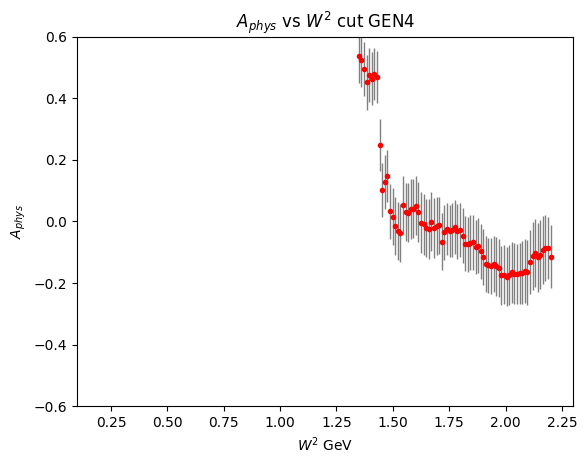

In [36]:
config="4"
plt.errorbar(w2_4,A_result_4,E_result_4,fmt='.',ecolor='grey',color='red',lw=1)
plt.title("$A_{phys}$ vs $W^2$ cut GEN"+config)
plt.xlabel("$W^2$ GeV")
plt.ylabel("$A_{phys}$")
plt.ylim(-.6,.6)
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_w2.png")

# dy

In [37]:
%%time
n_jobs = -1  # Use all available CPU cores
Results4dy = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutdy,val) for (val) in valuedy)

CPU times: user 528 ms, sys: 200 ms, total: 728 ms
Wall time: 8min 53s


Error in <TList::Clear>: A list is accessing an object (0x8065210) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x80656e0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x8065920) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x8065b30) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x8065ea0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x8066210) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x807e8e0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x807eca0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x807f550) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x807f940) alread

In [38]:
A_result_4dy=np.empty(0)
E_result_4dy=np.empty(0)
fbg_result_4dy=np.empty(0)
cut_result_4dy=np.empty(0)
dy_4=np.empty(0)
Y_4dy=np.empty(0)


for i in range(0,len(Results4dy)):
    A_result_4dy=np.append(A_result_4dy,Results4dy[i][0])
    E_result_4dy=np.append(E_result_4dy,Results4dy[i][1])  
    fbg_result_4dy=np.append(fbg_result_4dy,Results4dy[i][2])
    cut_result_4dy=np.append(cut_result_4dy,Results4dy[i][3])
    dy_4=np.append(dy_4,Results4dy[i][4][1])
    Y_4dy=np.append(Y_4dy,Results4dy[i][5])

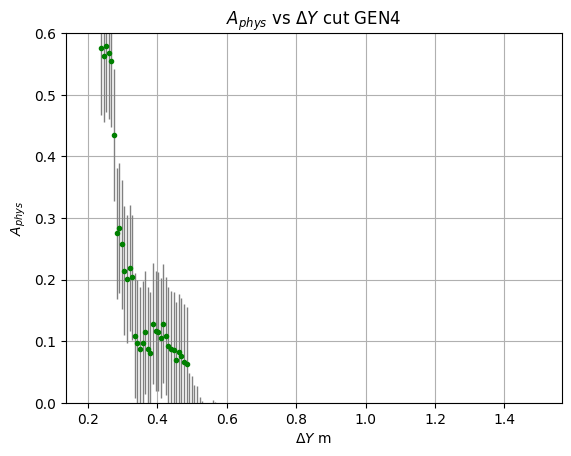

In [39]:
config="4"
plt.errorbar(dy_4,A_result_4dy,E_result_4dy,fmt='.',ecolor='grey',color='green',lw=1)
plt.title("$A_{phys}$ vs $\Delta Y$ cut GEN"+config)
plt.xlabel("$\Delta Y$ m")
plt.ylabel("$A_{phys}$")
plt.ylim(0,.6)
plt.grid()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_dy.png")

# dx

In [40]:
%%time
n_jobs = -1  # Use all available CPU cores
Results4dx = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutdx,val) for (val) in valuedx)

CPU times: user 566 ms, sys: 388 ms, total: 954 ms
Wall time: 8min 46s


Error in <TList::Clear>: A list is accessing an object (0x78ecdf0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x78ed2c0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x78ed500) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x78ed710) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x78eda80) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x78eddf0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x79064c0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x7906880) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x7907130) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x7907520) alread

In [41]:
A_result_4dx=np.empty(0)
E_result_4dx=np.empty(0)
fbg_result_4dx=np.empty(0)
cut_result_4dx=np.empty(0)
dx_4=np.empty(0)
Y_4dx=np.empty(0)


for i in range(0,len(Results4dx)):
    A_result_4dx=np.append(A_result_4dx,Results4dx[i][0])
    E_result_4dx=np.append(E_result_4dx,Results4dx[i][1])  
    fbg_result_4dx=np.append(fbg_result_4dx,Results4dx[i][2])
    cut_result_4dx=np.append(cut_result_4dx,Results4dx[i][3])
    dx_4=np.append(dx_4,Results4dx[i][4][1])
    Y_4dx=np.append(Y_4dx,Results4dx[i][5])

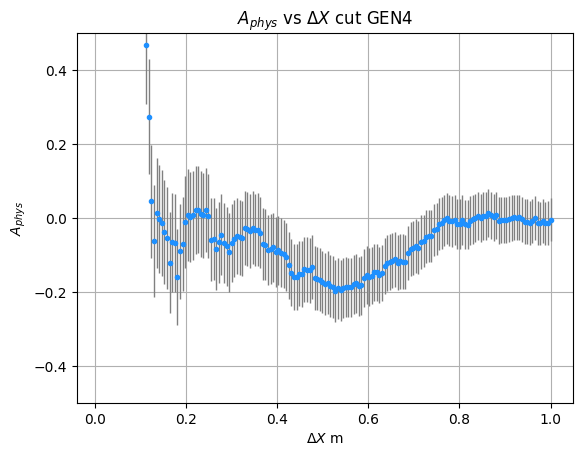

In [42]:
config="4"
plt.errorbar(dx_4,A_result_4dx,E_result_4dx,fmt='.',ecolor='grey',color='dodgerblue',lw=1)
plt.title("$A_{phys}$ vs $\Delta X$ cut GEN"+config)
plt.xlabel("$\Delta X$ m")
plt.ylabel("$A_{phys}$")
plt.ylim(-.5,.5)
plt.grid()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_dx.png")

# Nice Plotting

In [43]:
from DXDYW2COIN import *

# GEN2 Plots

In [44]:
config="2"

dxHist2,dyHist2,w2Hist2=Function_MAKEHIST(config)

Error in <TList::Clear>: A list is accessing an object (0xa3da630) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xa3dab00) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xa3dad40) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xa40d020) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xa40d390) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xa40d700) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xa40db60) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xab99070) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xab99480) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xab99890) alread

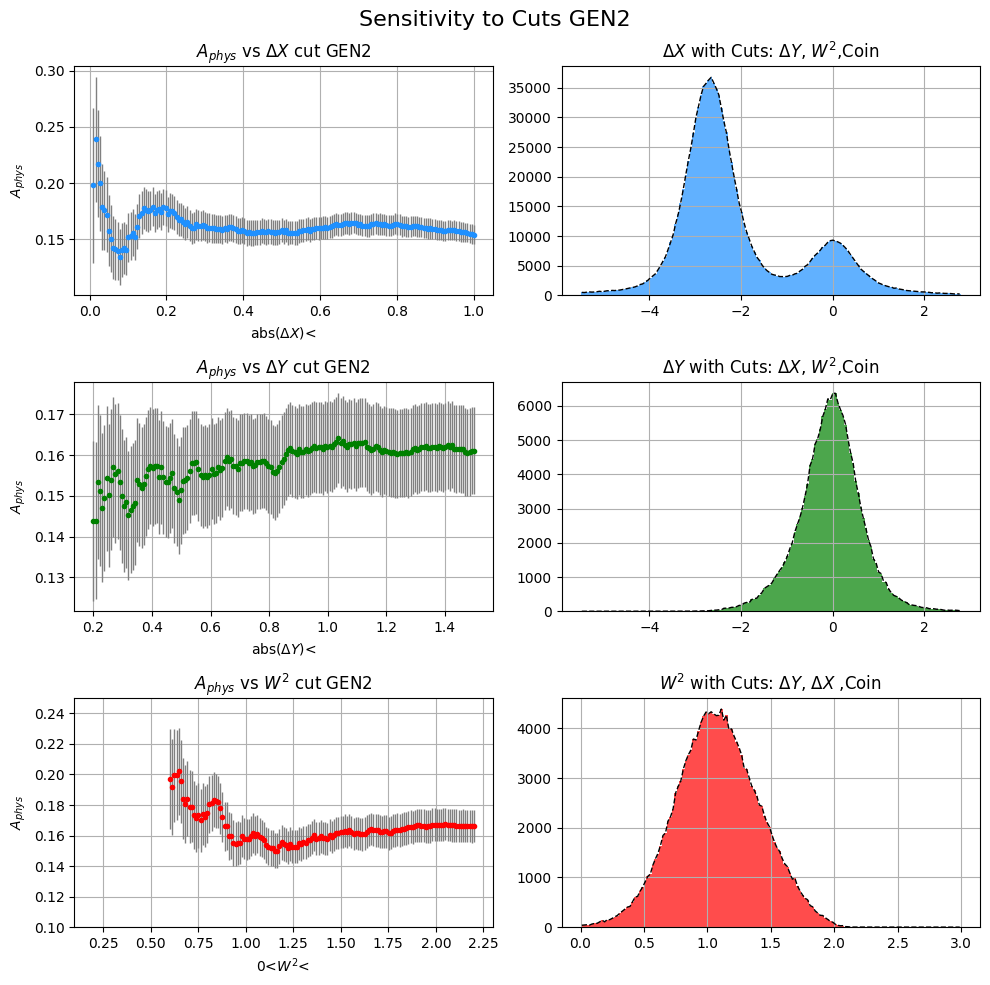

In [53]:
config="2"
lw=1
plt.figure(figsize=(10,10))
plt.suptitle('Sensitivity to Cuts GEN2', fontsize=16)

plt.subplot(3,2,1)
plt.errorbar(dx_2,A_result_2dx,E_result_2dx,fmt='.',ecolor='grey',color='dodgerblue',lw=1)
plt.title("$A_{phys}$ vs $\Delta X$ cut GEN"+config)
plt.xlabel("abs($\Delta X$)< ")
plt.ylabel("$A_{phys}$")
#plt.ylim(-.5,.5)
plt.grid()

plt.subplot(3,2,3)
plt.errorbar(dy_2,A_result_2dy,E_result_2dy,fmt='.',ecolor='grey',color='green',lw=1)
plt.title("$A_{phys}$ vs $\Delta Y$ cut GEN"+config)
plt.xlabel("abs($\Delta Y$)<")
plt.ylabel("$A_{phys}$")
#plt.ylim(0,.6)
plt.grid()

plt.subplot(3,2,5)
plt.grid()
plt.errorbar(w2_2,A_result_2,E_result_2,fmt='.',ecolor='grey',color='red',lw=1)
plt.title("$A_{phys}$ vs $W^2$ cut GEN"+config)
plt.xlabel("0<$W^2$< ")
plt.ylabel("$A_{phys}$")
plt.ylim(0.1,.25)


plt.subplot(3,2,2)
plt.title("$\Delta X$ with Cuts: $\Delta Y$, $W^2$,Coin")
bin_centers,bin_contents=dxHist2
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="dodgerblue",label="$\Delta X$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()
plt.subplot(3,2,4)
plt.title("$\Delta Y$ with Cuts: $\Delta X$, $W^2$,Coin")
bin_centers,bin_contents=dyHist2
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="green",label="$\Delta Y$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()
plt.subplot(3,2,6)
plt.title("$W^2$ with Cuts: $\Delta Y$, $\Delta X$ ,Coin")
bin_centers,bin_contents=w2Hist2
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="red",label="$\Delta Y$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()

plt.tight_layout()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_allcuts.png")


# GEN3 Plots

In [46]:
config="3"

dxHist3,dyHist3,w2Hist3=Function_MAKEHIST(config)

Error in <TList::Clear>: A list is accessing an object (0xb39b7e0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb33ddf0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb33dc90) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x4f25840) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb2a19e0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xa949840) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb3e5940) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb3dfc70) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xa464280) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xa4cf360) alread

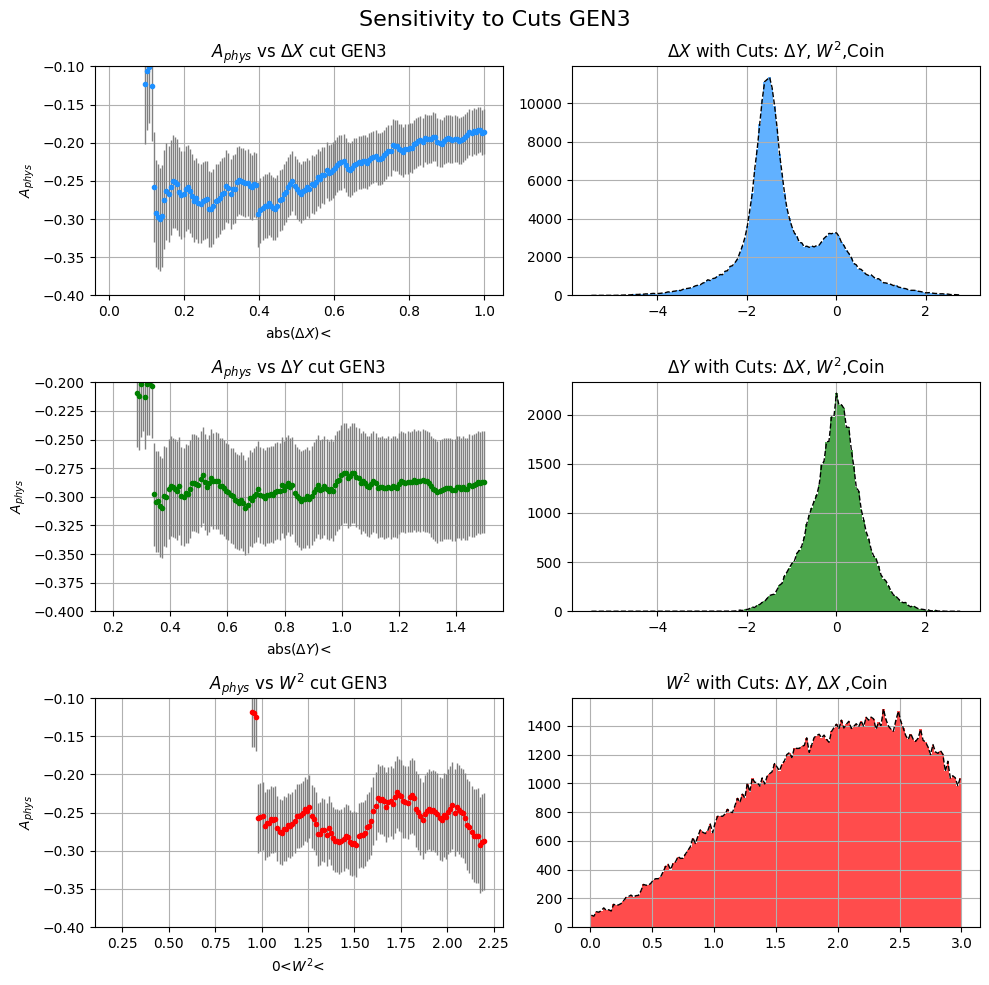

In [55]:
config="3"
lw=1
plt.figure(figsize=(10,10))
plt.suptitle('Sensitivity to Cuts GEN3', fontsize=16)

plt.subplot(3,2,1)
plt.errorbar(dx_3,A_result_3dx,E_result_3dx,fmt='.',ecolor='grey',color='dodgerblue',lw=1)
plt.title("$A_{phys}$ vs $\Delta X$ cut GEN"+config)
plt.xlabel("abs($\Delta X$)< ")
plt.ylabel("$A_{phys}$")
plt.ylim(-.4,-.1)
plt.grid()

plt.subplot(3,2,3)
plt.errorbar(dy_3,A_result_3dy,E_result_3dy,fmt='.',ecolor='grey',color='green',lw=1)
plt.title("$A_{phys}$ vs $\Delta Y$ cut GEN"+config)
plt.xlabel("abs($\Delta Y$)<")
plt.ylabel("$A_{phys}$")
plt.ylim(-.4,-.2)
plt.grid()

plt.subplot(3,2,5)
plt.errorbar(w2_3,A_result_3,E_result_3,fmt='.',ecolor='grey',color='red',lw=1)
plt.title("$A_{phys}$ vs $W^2$ cut GEN"+config)
plt.xlabel("0<$W^2$< ")
plt.ylabel("$A_{phys}$")
plt.ylim(-.4,-.1)
plt.grid()

plt.subplot(3,2,2)
plt.title("$\Delta X$ with Cuts: $\Delta Y$, $W^2$,Coin")
bin_centers,bin_contents=dxHist3
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="dodgerblue",label="$\Delta X$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()

plt.subplot(3,2,4)
plt.title("$\Delta Y$ with Cuts: $\Delta X$, $W^2$,Coin")
bin_centers,bin_contents=dyHist3
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="green",label="$\Delta Y$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()

plt.subplot(3,2,6)
plt.title("$W^2$ with Cuts: $\Delta Y$, $\Delta X$ ,Coin")
bin_centers,bin_contents=w2Hist3
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="red",label="$\Delta Y$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()
plt.tight_layout()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_allcuts.png")


# GEN4 Plots

In [48]:
config="4"

dxHist4,dyHist4,w2Hist4=Function_MAKEHIST(config)

Error in <THashList::Delete>: A list is accessing an object (0xbd4a500) already deleted (list name = THashList)


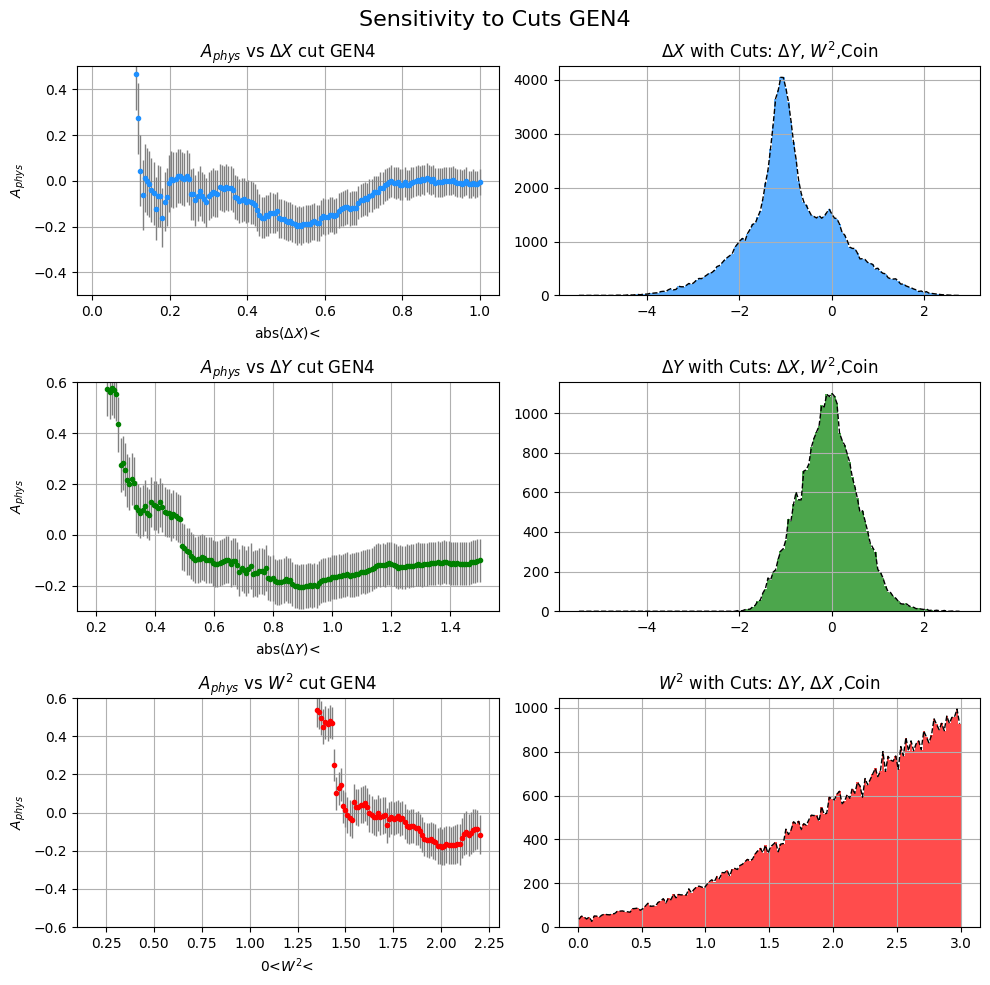

In [54]:
config="4"
lw=1
plt.figure(figsize=(10,10))
plt.suptitle('Sensitivity to Cuts GEN4', fontsize=16)

plt.subplot(3,2,1)
plt.errorbar(dx_4,A_result_4dx,E_result_4dx,fmt='.',ecolor='grey',color='dodgerblue',lw=1)
plt.title("$A_{phys}$ vs $\Delta X$ cut GEN"+config)
plt.xlabel("abs($\Delta X$)< ")
plt.ylabel("$A_{phys}$")
plt.ylim(-.5,.5)
plt.grid()

plt.subplot(3,2,3)
plt.errorbar(dy_4,A_result_4dy,E_result_4dy,fmt='.',ecolor='grey',color='green',lw=1)
plt.title("$A_{phys}$ vs $\Delta Y$ cut GEN"+config)
plt.xlabel("abs($\Delta Y$)<")
plt.ylabel("$A_{phys}$")
plt.ylim(-.3,.6)
plt.grid()

plt.subplot(3,2,5)
plt.errorbar(w2_4,A_result_4,E_result_4,fmt='.',ecolor='grey',color='red',lw=1)
plt.title("$A_{phys}$ vs $W^2$ cut GEN"+config)
plt.xlabel("0<$W^2$< ")
plt.ylabel("$A_{phys}$")
plt.ylim(-.6,.6)
plt.grid()

plt.subplot(3,2,2)
plt.title("$\Delta X$ with Cuts: $\Delta Y$, $W^2$,Coin")
bin_centers,bin_contents=dxHist4
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="dodgerblue",label="$\Delta X$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()

plt.subplot(3,2,4)
plt.title("$\Delta Y$ with Cuts: $\Delta X$, $W^2$,Coin")
bin_centers,bin_contents=dyHist4
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="green",label="$\Delta Y$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()

plt.subplot(3,2,6)
plt.title("$W^2$ with Cuts: $\Delta Y$, $\Delta X$ ,Coin")
bin_centers,bin_contents=w2Hist4
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="red",label="$\Delta Y$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()
plt.tight_layout()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_allcuts.png")
